In [49]:
import pandas as pd
import matplotlib.pyplot as plt 
import mygene
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind
import gseapy as gp

In [5]:
# Import Data
df = df = pd.read_csv("GSE295225_AllSamples_DESEQ2_NormalizedCounts.txt",sep="\t",index_col=0)
print(df)

        PAR_6h_Veh_1  PAR_6h_Veh_2  PAR_6h_Veh_3  PAR_6h_CD1530_1  \
A1BG       58.577630     49.043105     45.168368        56.157058   
A2ML1       5.325239      5.702687      7.352990         1.936450   
A4GALT    783.875188    780.127530    771.013540       804.595087   
AAAS      904.225591    914.710935    945.384450       889.798899   
AACS     2110.924760   2114.556201   2097.703052      2002.289579   
...              ...           ...           ...              ...   
ZXDC      714.647081    685.462932    724.794745       738.755778   
ZYG11B    500.572471    573.690274    529.415292       584.807981   
ZYX      2772.319450   2804.581282   2793.085836      2651.000419   
ZZEF1    2565.700175   2849.062238   2677.538848      2633.572366   
ZZZ3     1090.608958   1159.926460   1112.402369      1117.331805   

        PAR_6h_CD1530_2  PAR_6h_CD1530_3  PAR_6h_RA_1  PAR_6h_RA_2  \
A1BG          50.643388        46.417822    56.421797    49.501104   
A2ML1          3.617385        

In [36]:
# Gen-Abfrage
gene_symbol = "A1BG"
mg = mygene.MyGeneInfo()
mg.query(gene_symbol)

{'took': 18,
 'total': 228,
 'max_score': 156.25928,
 'hits': [{'_id': '1',
   '_score': 156.25928,
   'entrezgene': '1',
   'name': 'alpha-1-B glycoprotein',
   'symbol': 'A1BG',
   'taxid': 9606},
  {'_id': '117586',
   '_score': 131.05617,
   'entrezgene': '117586',
   'name': 'alpha-1-B glycoprotein',
   'symbol': 'A1bg',
   'taxid': 10090},
  {'_id': '140656',
   '_score': 110.893684,
   'entrezgene': '140656',
   'name': 'alpha-1-B glycoprotein',
   'symbol': 'A1bg',
   'taxid': 10116},
  {'_id': '503538',
   '_score': 109.12562,
   'entrezgene': '503538',
   'name': 'A1BG antisense RNA 1',
   'symbol': 'A1BG-AS1',
   'taxid': 9606},
  {'_id': '102129055',
   '_score': 100.81244,
   'entrezgene': '102129055',
   'name': 'alpha-1-B glycoprotein',
   'symbol': 'A1BG',
   'taxid': 9541},
  {'_id': 'ENSMSPG00010022512',
   '_score': 100.81244,
   'symbol': 'A1bg',
   'taxid': 10096},
  {'_id': '101176821',
   '_score': 100.81244,
   'entrezgene': '101176821',
   'name': 'alpha-1-B gl

In [11]:
# Log2-Transformation  
df_log = np.log2(df + 1)

In [12]:
df_log.describe()

,PAR_6h_Veh_1,PAR_6h_Veh_2,PAR_6h_Veh_3,PAR_6h_CD1530_1,PAR_6h_CD1530_2,PAR_6h_CD1530_3,PAR_6h_RA_1,PAR_6h_RA_2,PAR_6h_RA_3,RARGKO_6h_Veh_1,...,PAR_48h_RA_3,RARGKO_48h_Veh_1,RARGKO_48h_Veh_2,RARGKO_48h_Veh_3,RARGKO_48h_CD1530_1,RARGKO_48h_CD1530_2,RARGKO_48h_CD1530_3,RARGKO_48h_RA_1,RARGKO_48h_RA_2,RARGKO_48h_RA_3
count,15054.000000,15054.000000,15054.000000,15054.000000,15054.000000,15054.000000,15054.000000,15054.000000,15054.000000,15054.000000,...,15054.000000,15054.000000,15054.000000,15054.000000,15054.000000,15054.000000,15054.000000,15054.000000,15054.000000,15054.000000
mean,8.702764,8.699473,8.694073,8.707748,8.698686,8.696073,8.714098,8.707685,8.702130,8.686614,...,8.781401,8.711220,8.687919,8.687320,8.738322,8.761153,8.742563,8.757619,8.736109,8.753953
std,3.132568,3.153289,3.155579,3.111702,3.138800,3.149673,3.142591,3.159784,3.175993,3.161883,...,2.981288,3.125701,3.177430,3.172565,3.075845,2.998244,3.045528,3.020733,3.085234,3.035304
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.585780,6.562610,6.529621,6.597744,6.570645,6.552064,6.555302,6.540276,6.554186,6.501214,...,6.756707,6.561816,6.534926,6.515711,6.677940,6.742551,6.706228,6.734656,6.644354,6.728790
50%,9.395700,9.391536,9.392796,9.395389,9.394957,9.380837,9.403165,9.408669,9.402179,9.383111,...,9.404296,9.410237,9.410034,9.407881,9.417344,9.413316,9.415973,9.416548,9.420956,9.417423
75%,10.979615,10.998579,10.992038,10.969375,10.982365,10.997861,10.998621,11.017413,11.013669,10.979411,...,10.914366,10.965871,10.976954,10.975304,10.921480,10.875617,10.908302,10.907430,10.937417,10.913340
max,17.886691,17.863726,17.866489,17.768366,17.750537,17.866123,17.849719,17.876824,17.928159,18.054221,...,18.193576,17.978021,18.052108,18.030837,18.395014,18.317224,18.412920,18.345861,18.215150,18.162415


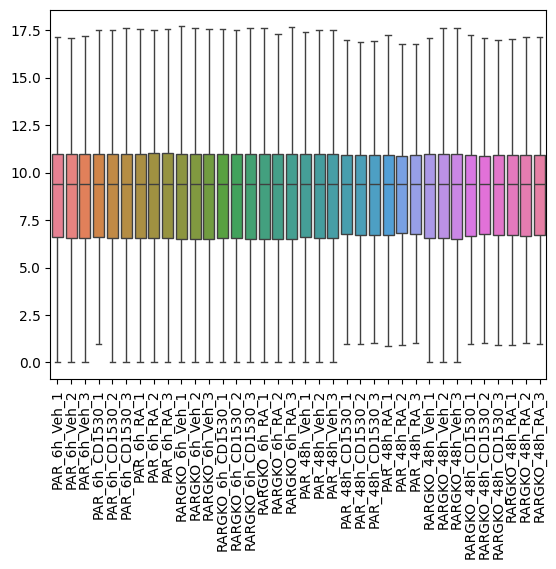

In [14]:
# Plotten der statistisch interessanten Werte 
sns.boxplot(data=df_log, showfliers=False)
plt.xticks(rotation=90)
plt.show()

In [15]:
# Metadaten zu den einzelnen Treatments
meta = pd.DataFrame({
    "sample": df.columns
})

meta[["genotype", "time", "treatment", "rep"]] = meta["sample"].str.split("_", expand=True)

meta

,sample,genotype,time,treatment,rep
0,PAR_6h_Veh_1,PAR,6h,Veh,1
1,PAR_6h_Veh_2,PAR,6h,Veh,2
2,PAR_6h_Veh_3,PAR,6h,Veh,3
3,PAR_6h_CD1530_1,PAR,6h,CD1530,1
4,PAR_6h_CD1530_2,PAR,6h,CD1530,2
5,PAR_6h_CD1530_3,PAR,6h,CD1530,3
6,PAR_6h_RA_1,PAR,6h,RA,1
7,PAR_6h_RA_2,PAR,6h,RA,2
8,PAR_6h_RA_3,PAR,6h,RA,3
9,RARGKO_6h_Veh_1,RARGKO,6h,Veh,1


In [21]:
# PCA
X = df_log.T  
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
pcs = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(pcs, columns=["PC1", "PC2"])
pca_df = pd.concat([pca_df, meta.reset_index(drop=True)], axis=1)


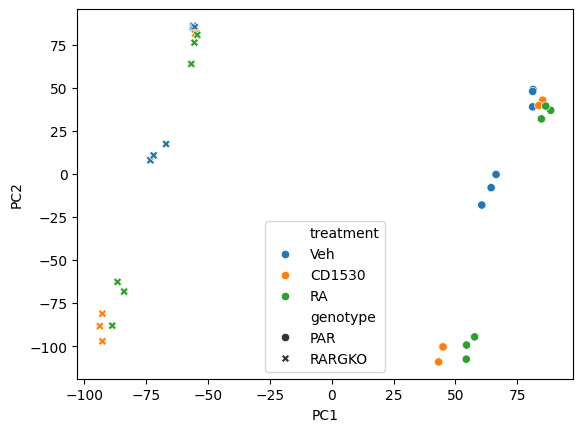

In [22]:
sns.scatterplot(
    data=pca_df,
    x="PC1", y="PC2",
    hue="treatment",
    style="genotype"
)
plt.show()

In [23]:
par_6h_ra = df_log.filter(regex="^PAR_6h_RA")
par_6h_veh = df_log.filter(regex="^PAR_6h_Veh")

logFC = par_6h_ra.mean(axis=1) - par_6h_veh.mean(axis=1)

logFC.sort_values(ascending=False).head(20)


CYP26A1          7.477579
TRIM31           3.724371
CYP26B1          3.652030
CDH5             3.531276
LILRA6           3.347692
ARL14EPL         2.714807
KLRC4-KLRK1      2.706698
TXK              2.605429
C1QTNF3-AMACR    2.501337
HOXA5            2.460399
CNR1             2.417542
CCDC33           2.374339
MPV17L           2.364363
ERICH5           2.344933
HOXA4            2.330458
SMN2             2.273161
ELF3             2.269664
ISLR2            2.219729
POU2AF2          2.198898
HOXA3            2.187978
dtype: float64

In [26]:
pvals = []

for gene in df_log.index:
    ra = df_log.loc[gene, par_6h_ra.columns]
    veh = df_log.loc[gene, par_6h_veh.columns]
    pvals.append(ttest_ind(ra, veh, equal_var=False).pvalue)

res = pd.DataFrame({
    "logFC": logFC,
    "pval": pvals
}, index=df_log.index)

res["FDR"] = pd.Series(pvals, index=df_log.index).rank(method="min") / len(pvals)

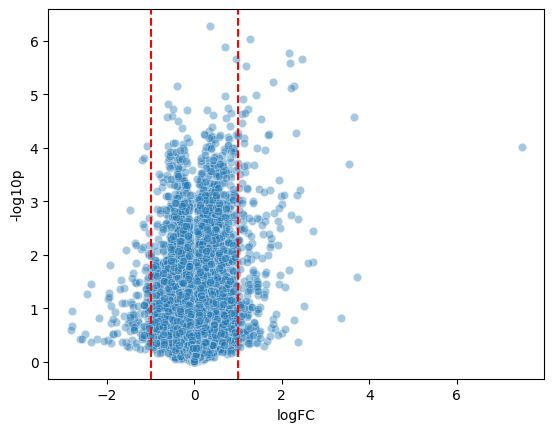

In [27]:
res["-log10p"] = -np.log10(res["pval"])

sns.scatterplot(
    data=res,
    x="logFC",
    y="-log10p",
    alpha=0.4
)
plt.axvline(1, color="red", linestyle="--")
plt.axvline(-1, color="red", linestyle="--")
plt.show()

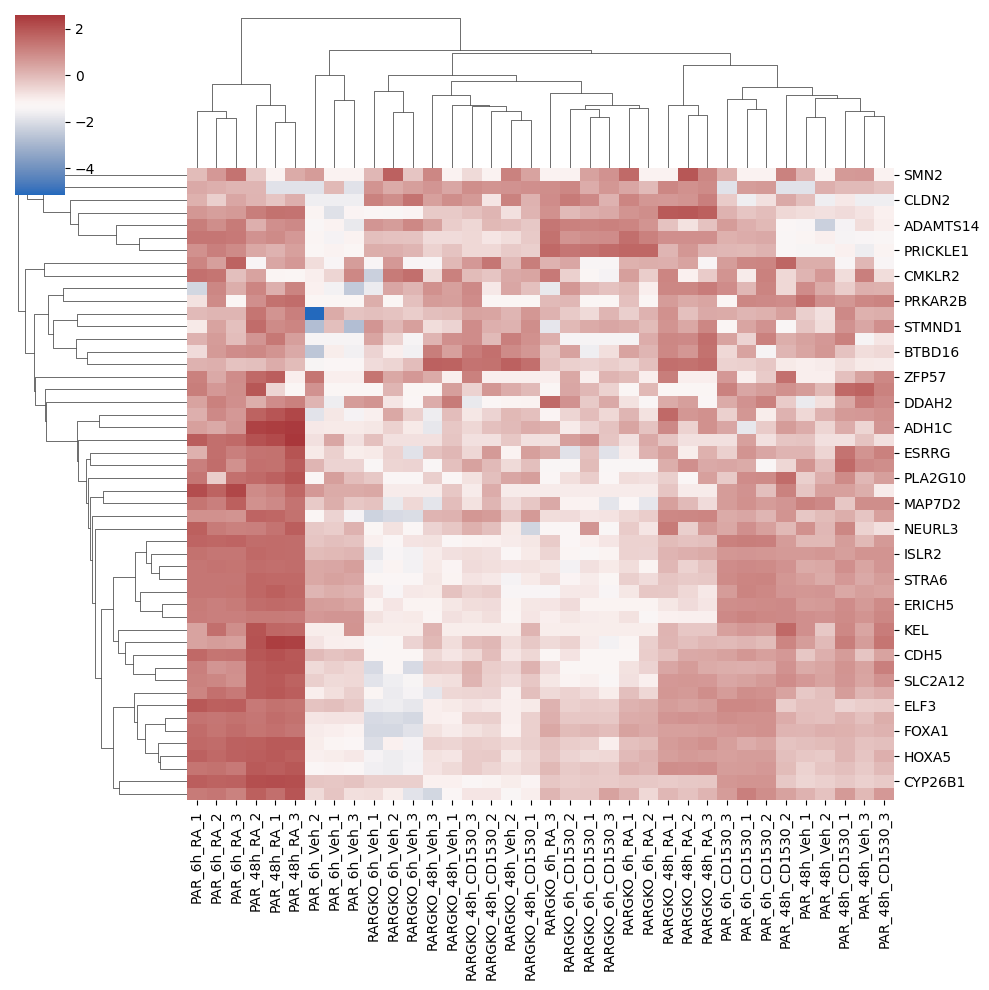

In [28]:
top_genes = res.sort_values("logFC", ascending=False).head(50).index

sns.clustermap(
    df_log.loc[top_genes],
    cmap="vlag",
    col_cluster=True,
    z_score=0
)

In [38]:
genes = df.index.tolist()
len(genes)


15054

In [39]:
genes = (
    df.index
    .astype(str)
    .str.strip()      # entfernt Leerzeichen, Tabs, \r
    .str.upper()      # HGNC-Symbole sind uppercase
    .unique()
    .tolist()
)


In [40]:
query = mg.querymany(
    genes,
    scopes=["symbol", "alias"],
    fields=[
        "symbol",
        "entrezgene",
        "ensembl.gene",
        "name",
        "go",
        "type_of_gene"
    ],
    species="human",
    as_dataframe=True
)

889 input query terms found dup hits:	[('ACAT1', 2), ('ACAT2', 2), ('ACP1', 2), ('ACTB', 2), ('ADA2', 2), ('ADCY3', 2), ('ADK', 2), ('AGPS
1 input query terms found no hit:	['UNKNOWN']


In [61]:
mygene_df = (
    query
    .reset_index()
    .rename(columns={"query": "symbol"})
    .drop_duplicates(subset="symbol", keep="first")
    .set_index("symbol")
)

# Reset Multi-Index
mygene_df = mygene_df.reset_index()

# 'symbol' Spalte ist jetzt Tuple: ('A1BG', 'A1BG')
# Wir extrahieren den ersten Eintrag
mygene_df['symbol'] = mygene_df['symbol'].apply(lambda x: x[0])

# Optional: Duplikate entfernen (erstes Match behalten)
mygene_df = mygene_df.drop_duplicates(subset='symbol', keep='first')

# Setze Index auf Symbol
mygene_df = mygene_df.set_index('symbol')


In [62]:
print(mygene_df)

           _id     _score entrezgene  \
symbol                                 
A1BG         1  19.532227          1   
A2ML1   144568  19.193878     144568   
A4GALT   53947  18.579138      53947   
AAAS      8086  17.626383       8086   
AACS     65985  17.566912      65985   
...        ...        ...        ...   
ZXDC     79364  18.325268      79364   
ZYG11B   79699  18.893654      79699   
ZYX       7791  17.362670       7791   
ZZEF1    23140  17.582193      23140   
ZZZ3     26009  17.605564      26009   

                                                     name    type_of_gene  \
symbol                                                                      
A1BG                               alpha-1-B glycoprotein  protein-coding   
A2ML1                        alpha-2-macroglobulin like 1  protein-coding   
A4GALT  alpha 1,4-galactosyltransferase (P1PK blood gr...  protein-coding   
AAAS                         aladin WD repeat nucleoporin  protein-coding   
AACS             

In [63]:
df_annot = res.join(mygene_df, how="left")
df_annot.head()
df_annot
df_annot["entrezgene"].notna().sum()

np.int64(14855)

In [64]:
# Signifikante Gene
sig = df_annot[
    (df_annot["FDR"] < 0.05) &
    (df_annot["logFC"].abs() > 1)
].dropna(subset=["entrezgene"])


In [65]:
entrez_sig = sig["entrezgene"].astype(int).tolist()
print(entrez_sig)

[140766, 105, 147, 241, 51129, 644100, 146712, 79365, 8436, 80125, 168455, 151887, 4695, 1003, 1366, 1259, 56117, 1592, 56603, 81553, 375791, 23604, 9249, 81704, 1999, 2036, 203111, 121506, 114907, 2257, 9965, 114827, 3169, 2533, 79695, 115361, 2672, 9283, 51704, 3038, 338442, 8843, 3198, 3199, 3200, 3201, 3202, 3486, 3589, 3569, 57611, 256714, 744, 4602, 8204, 5031, 23239, 9814, 5327, 9890, 341032, 144165, 5795, 387496, 54809, 5413, 6469, 154091, 85027, 64220, 161176, 7056, 7057, 79838, 120939, 7127, 9966, 319089, 7429, 51384, 653082, 65249]


In [66]:
(df_annot["FDR"] < 0.05).sum()


np.int64(752)

In [67]:
(df_annot["logFC"].abs() > 1).sum()

np.int64(346)

In [68]:
sig = df_annot[
    (df_annot["FDR"] < 0.05) &
    (df_annot["logFC"].abs() > 0.2)
].dropna(subset=["entrezgene"])

In [69]:
print(sig)

           logFC      pval       FDR   -log10p     _id     _score entrezgene  \
ABCG2   0.773911  0.002078  0.033081  2.682402    9429  18.511030       9429   
ABHD4   0.271749  0.000171  0.007108  3.765791   63874  18.028662      63874   
ABTB2   0.295551  0.002234  0.034742  2.650906   25841  18.198774      25841   
ABTB3   0.838769  0.000810  0.018400  3.091473  121551  18.210245     121551   
ACP6    0.596357  0.000741  0.017005  3.129922   51205  17.664986      51205   
...          ...       ...       ...       ...     ...        ...        ...   
ZNF474 -0.724636  0.000435  0.012887  3.361193  133923  21.499743     133923   
ZNF704  0.539204  0.001525  0.027900  2.816816  619279  17.647106     619279   
ZNF888  0.288457  0.003292  0.043244  2.482596  388559  23.923683     388559   
ZNRF1   0.491285  0.000770  0.017670  3.113752   84937  17.606700      84937   
ZSWIM4  1.243117  0.002055  0.033014  2.687157   65249  18.875677      65249   

                                       

In [70]:
entrez_sig = sig["entrezgene"].astype(int).tolist()
len(entrez_sig)

604

In [78]:
entrez_sig_str = [str(x) for x in entrez_sig]
symbols_sig = sig.index.tolist()

go = gp.enrichr(
    gene_list=symbols_sig,
    gene_sets="GO_Biological_Process_2023",
    organism="Human",
    outdir=None
)

go.results.head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Positive Regulation Of DNA-templated Transcrip...,84/1243,2.633457e-12,7.800301e-09,0,0,2.541827,67.772017,FOXA1;EHF;PID1;FOXE1;TGFB1I1;RASL11A;SIX1;LITA...
1,GO_Biological_Process_2023,Positive Regulation Of Nucleic Acid-Templated ...,49/557,2.192662e-11,3.247332e-08,0,0,3.282656,80.567273,FOXE1;TGFB1I1;SIX1;GLI2;SOX2;SHH;MECOM;MYB;SOX...
2,GO_Biological_Process_2023,Regulation Of Cell Population Proliferation (G...,59/766,4.292471e-11,4.238100e-08,0,0,2.861687,68.312976,CDKN1A;CSF1;TGFB1I1;RTKN2;SIX1;PTPRJ;SHH;CTSH;...
3,GO_Biological_Process_2023,Positive Regulation Of Cell Motility (GO:2000147),27/221,7.451120e-10,5.517555e-07,0,0,4.631618,97.344958,GRB7;NOTCH1;CSF1;NEDD9;PIK3CD;SEMA3F;CLDN1;NTN...
4,GO_Biological_Process_2023,Positive Regulation Of Transcription By RNA Po...,64/938,9.432754e-10,5.587964e-07,0,0,2.511670,52.196689,FOXA1;EHF;PID1;SIX1;LITAF;ETS2;GLI2;SOX2;SHH;M...
5,GO_Biological_Process_2023,Regulation Of DNA-templated Transcription (GO:...,105/1922,1.261942e-09,6.019550e-07,0,0,2.035767,41.714109,FOXA1;EHF;GFI1;NAB2;HR;IKZF2;ETS2;LOXL2;FOXQ1;...
6,GO_Biological_Process_2023,Regulation Of Cell Migration (GO:0030334),39/434,1.422581e-09,6.019550e-07,0,0,3.320439,67.639978,GRB7;NOTCH1;CSF1;PIK3CD;NEDD9;PRR5L;PTPRJ;SEMA...
7,GO_Biological_Process_2023,Positive Regulation Of Cell Migration (GO:0030...,29/272,4.298165e-09,1.591395e-06,0,0,3.975216,76.582838,GRB7;NOTCH1;CSF1;NEDD9;PIK3CD;SEMA3F;CLDN1;THB...
8,GO_Biological_Process_2023,Positive Regulation Of Epithelial To Mesenchym...,12/47,1.026494e-08,3.378306e-06,0,0,11.212934,206.256675,COL1A1;FOXC1;IL6;NOTCH1;JAG1;SMAD3;BAMBI;TGFB1...
9,GO_Biological_Process_2023,Negative Regulation Of Cell Population Prolife...,34/379,1.712139e-08,5.071355e-06,0,0,3.293842,58.903568,CDKN1A;NOTCH1;TGFB1I1;GATA6;PTPRJ;GATA3;THBS1;...


<Axes: title={'center': 'GO Biological Process'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

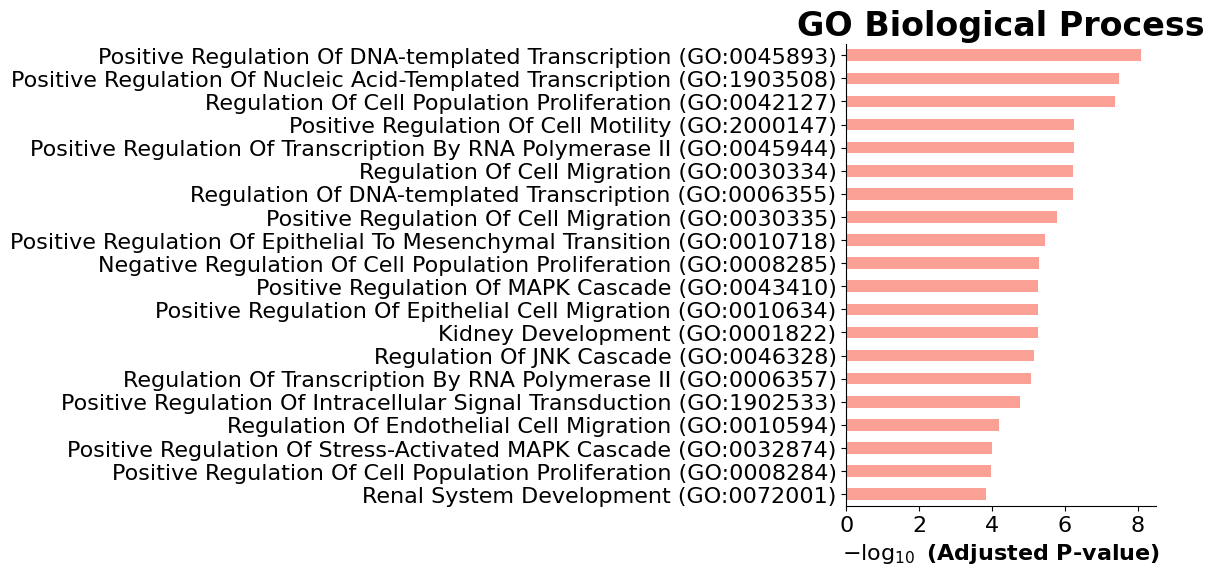

In [79]:
gp.barplot(
    go.results,
    column="Adjusted P-value",
    title="GO Biological Process",
    top_term=20
)
